## Extending to four Component PR EOS

In [9]:
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib import rcParams
import numpy as np
import matplotlib.cm as cm # matplotlib's color map library
#rcParams['figure.figsize'] = 18.75, 18.75
from scipy import stats
import seaborn as sns
from scipy.interpolate import griddata
import seaborn as sns
import pr_z_v7 as pr_z
R, mwAir, degF2R = 10.731577089016, 28.97, 459.67

import importlib
importlib.reload(pr_z)
import pyrestoolbox as rtb
importlib.reload(rtb)

import gerg2
importlib.reload(gerg2)

<module 'gerg2' from 'C:\\Users\\burmr\\OneDrive - Santos\\Work in progress\\Python\\0-ResEng\\Z-Factors\\Inerts2\\gerg2.py'>

In [2]:
pr_z.tc_pc(0.6)

(352.02986202189106, 667.5840785142526)

In [3]:
hc_mw, degf = 45.088, 300
pr_z.calc_bips(hc_mw, degf)

array([[ 0.        ,  0.14437977, -0.1003623 ,  0.87892892,  0.06253177],
       [ 0.14437977,  0.        ,  0.65904709,  1.19053021,  0.03673269],
       [-0.1003623 ,  0.65904709,  0.        ,  0.258919  , -0.0146364 ],
       [ 0.87892892,  1.19053021,  0.258919  ,  0.        ,  0.30301406],
       [ 0.06253177,  0.03673269, -0.0146364 ,  0.30301406,  0.        ]])

In [4]:
degf, psia, sg, co2, h2s, n2, h2 = 220, 15000, 0.6, 0.0, 0, 0, 0
z = pr_z.peng_robinson_z(degf, psia, sg, co2=co2, h2s=h2s, n2=n2, h2 = h2)
vis = pr_z.lbc(z, degf, psia, sg, co2=co2, h2s=h2s, n2=n2, h2 = h2)
z, vis

(1.7617904810330733, 0.04326307281348836)

In [5]:
rcParams['figure.figsize'] = 9, 9

In [6]:
def Zplots(component, psat_coefics):
    rcParams['figure.figsize'] = 9, 9

    plt.plot(Zs, calc_Zs, 'o')
    plt.plot([min(Zs), max(Zs)], [min(Zs), max(Zs)], '--', c='k')
    plt.title(component+' Calculated vs GERG2008 Molar Density')
    plt.xlabel('GERG2008 Z-Factor')
    plt.ylabel('Calculated Z-Factor')
    plt.grid()
    plt.savefig('images\\'+component+'_1.png')
    plt.show()
    errs = np.abs(calc_Zs - Zs)/Zs
    print('Average Relative error:',np.mean(errs))
    print('95% of data better than error:', np.percentile(errs, 95))
    
    #errs = (calc_Zs - Zs)/Zs
    errs = (molar_densities - calc_molar_densities)/molar_densities
    plt.plot(molar_densities, errs, 'o')
    plt.title(component+' Relative Error in Calculated Molar Density')
    plt.xlabel('GERG2008 Molar Density (lb-mol/cuft)')
    plt.ylabel('(Calculated - GERG2008-Z)/GERG2008')
    plt.grid()
    plt.ylim(-0.1, 0.1)
    plt.savefig('images\\'+component+'_2.png')
    plt.show()
    
    #fig, ax = plt.subplots()
    #res = stats.probplot(errs, plot=ax)
    #ax.set_title('Normal Probability Plot of '+component+' Residuals')
    #ax.set_xlabel('Theoretical Quantiles')
    #ax.set_ylabel('Ordered Values')
    #plt.show()

    x = degfs
    y = psias
    z = errs
    
    tc, a0, a1, a2, a3 = psat_coefics
    tsat = np.arange(x[0], tc, 0.1)
    psat = a0*tsat**3+a1*tsat**2+a2*tsat+a3
    pc = a0*tc**3+a1*tc**2+a2*tc+a3

    # target grid to interpolate to
    yi = np.arange(15,15000,20)
    xi = np.arange(50, 300, 5)
    xi,yi = np.meshgrid(xi,yi)

    # interpolate
    zi = griddata((x,y), z, (xi,yi),method='linear')

    rcParams['figure.figsize'] = 11, 9
    fig, ax = plt.subplots()
    #c = ax.pcolormesh(xi, yi, zi, cmap='RdBu', vmin=zi.min(), vmax=zi.max())
    c = ax.pcolormesh(xi, yi, zi, cmap='RdBu', vmin=-0.05, vmax=0.05)
    levels = np.arange(-0.05, 0.06, 0.01)
    CS = ax.contour(xi, yi, zi, levels=levels, linewidths=0.5, colors='k')
    ax.clabel(CS, inline=True, fontsize=10)

    ax.set_title(component+' Molar Density Relative Error (Calc - GERG) / GERG')
    # set the limits of the plot to the limits of the data
    ax.axis([xi.min(), xi.max(), yi.min(), yi.max()])
    ax.set_ylabel('psia')
    ax.set_xlabel('degf')
    ax.set_ylim(0, 15000)
    ax.set_xlim(60, 300)
    
    plt.plot(tsat, psat, c='g')
    plt.plot([tc], [pc], 'o', c='g')
    
    #ax.set_ylim(0, 15)
    fig.colorbar(c, ax=ax)
    plt.savefig('images\\'+component+'_3.png')
    plt.show()
    rcParams['figure.figsize'] = 9, 9

def molar_plots(component):
    rcParams['figure.figsize'] = 9, 9
    
    plt.plot(molar_densities, calc_molar_densities, 'o')
    plt.plot([min(molar_densities), max(molar_densities)], [min(molar_densities), max(molar_densities)], '--', c='k')
    plt.title(component+' Calculated Molar Density vs GERG2008')
    plt.xlabel('GERG2008 Molar Density (lbmol/ft3)')
    plt.ylabel('Calculated Molar Density (lbmol/ft3)')
    plt.grid()
    #plt.savefig('co2.png')
    plt.show()
    errs = np.abs(calc_molar_densities - molar_densities)/molar_densities
    print('Average Relative absolute error:',np.mean(errs))
    print('95% of data better than error:', np.percentile(errs, 95))
    
    errs = (calc_molar_densities - molar_densities)/molar_densities
    plt.plot(molar_densities, errs, 'o')
    plt.title(component+' Relative Error in Calculated Molar Density')
    plt.xlabel('GERG2008 Molar Density (lbmol/ft3)')
    plt.ylabel('(Calculated - GERG2008)/GERG2008')
    plt.grid()
    plt.ylim(-0.1, 0.1)
    plt.savefig('images\\'+component+'_4.png')
    plt.show()

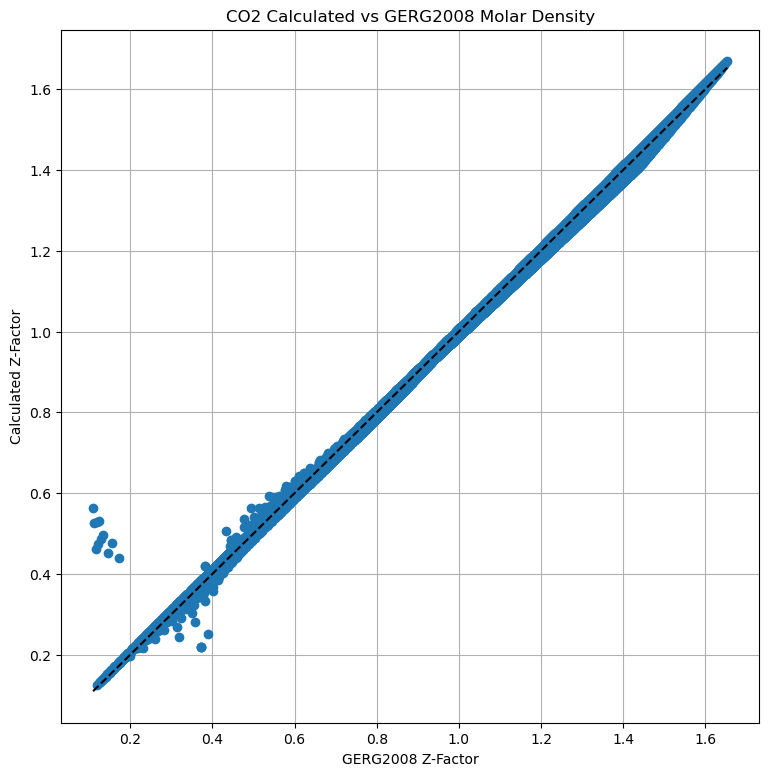

Average Relative error: 0.010678513389094566
95% of data better than error: 0.021066133313967502


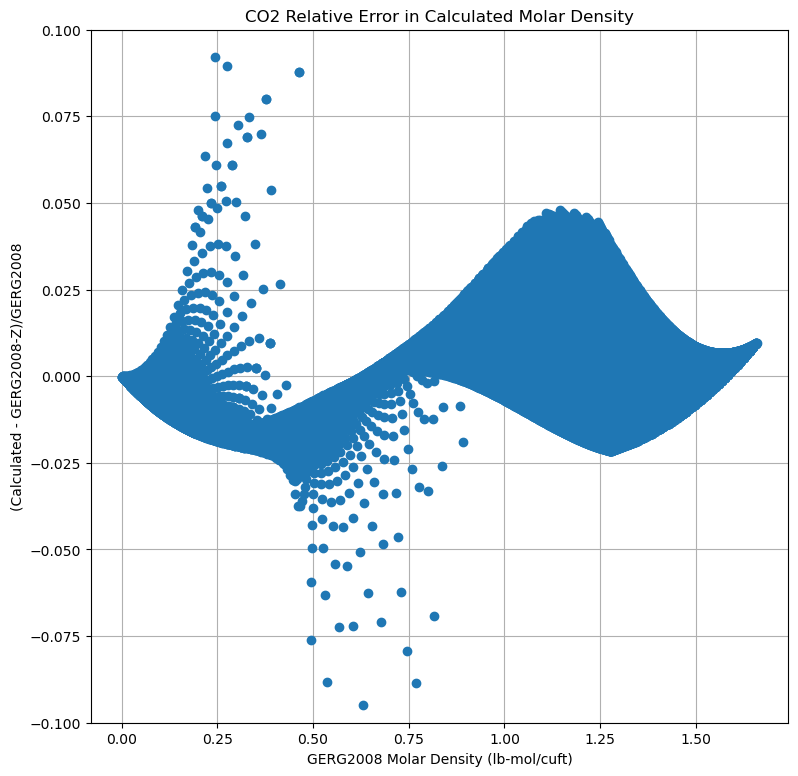

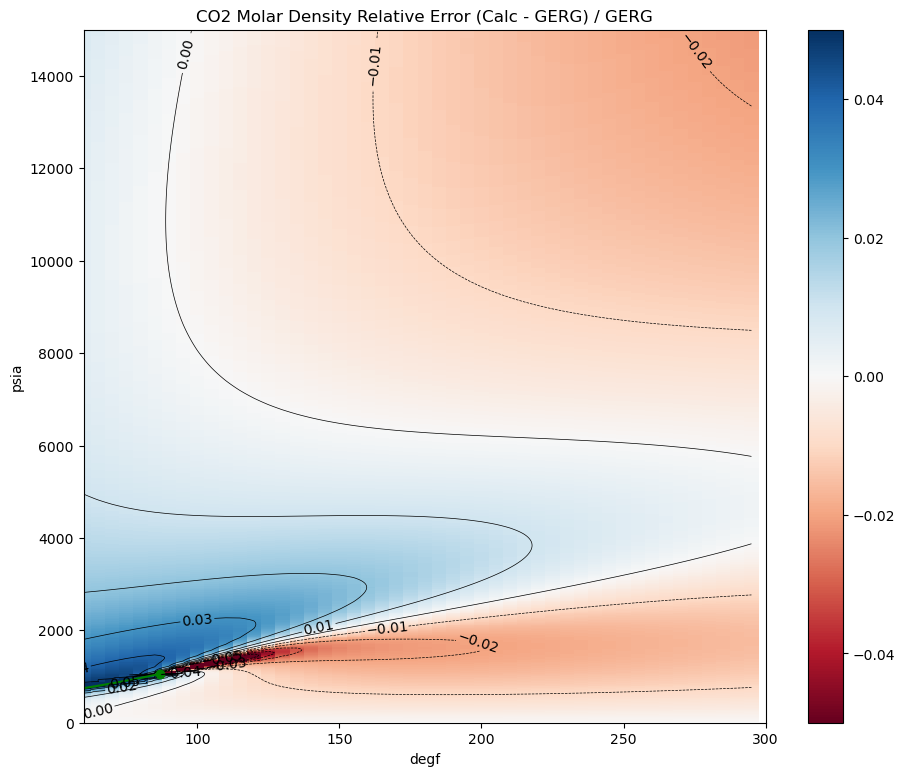

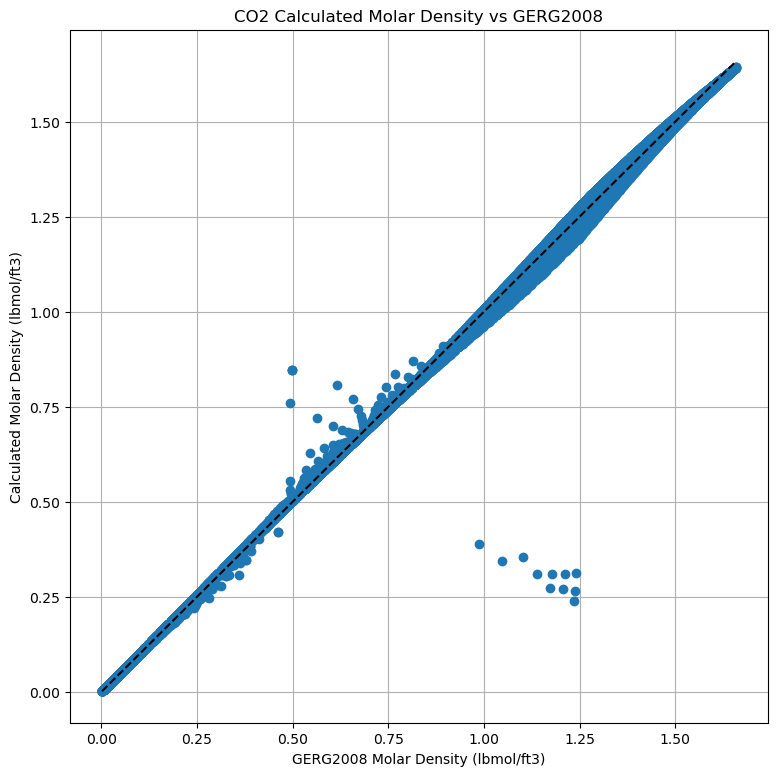

Average Relative absolute error: 0.009968386445316984
95% of data better than error: 0.021106844119359137


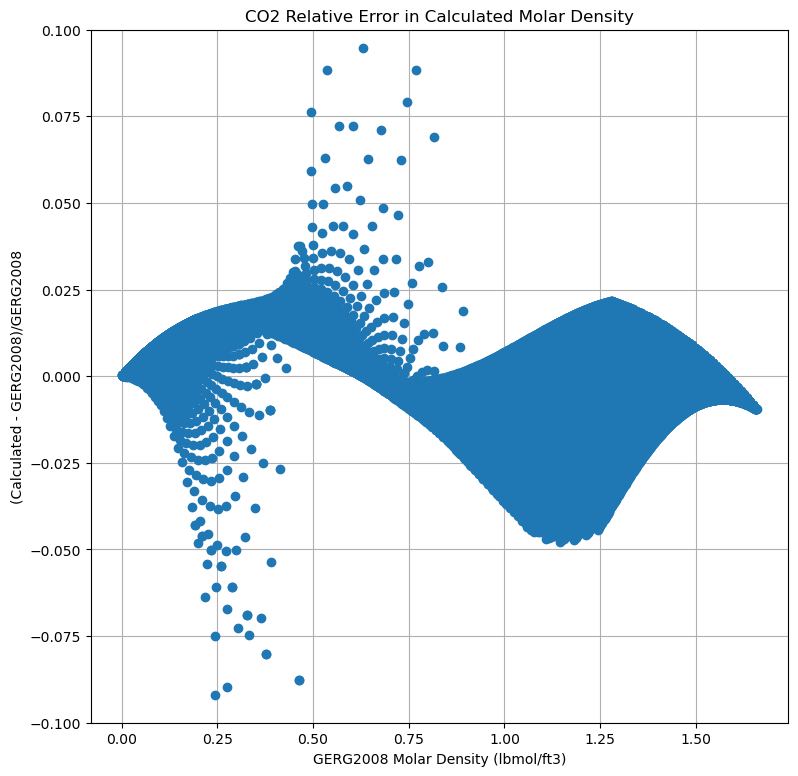

In [140]:
# Compare pure CO2
mwAir = 28.97
mwGas = 44.01
sg = mwGas/mwAir
co2, h2s, n2, h2 = 1.0, 0.0, 0.0, 0.0
df = pd.read_excel('Z-GERG_CO2.xlsx')#, sheet_name='CO2')
degfs = np.array(df['Temperature (F)'])
psias = np.array(df['Pressure (psia)'])
Zs = np.array(df['Z-Gerg'])
molar_densities = psias/(Zs*R*(degfs+degF2R)) # lb-mol/(cuft.lbm)
calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sg, co2=co2, h2s=h2s, n2=n2, h2=h2))
calc_Zs = np.array(calc_Zs)
calc_molar_densities = psias/(calc_Zs*R*(degfs+degF2R))
errs = np.abs(calc_Zs - Zs)/Zs
Zplots('CO2', [87, 0.000199491, 0.016819666, 5.798738321, 296.0668442])
molar_plots('CO2')

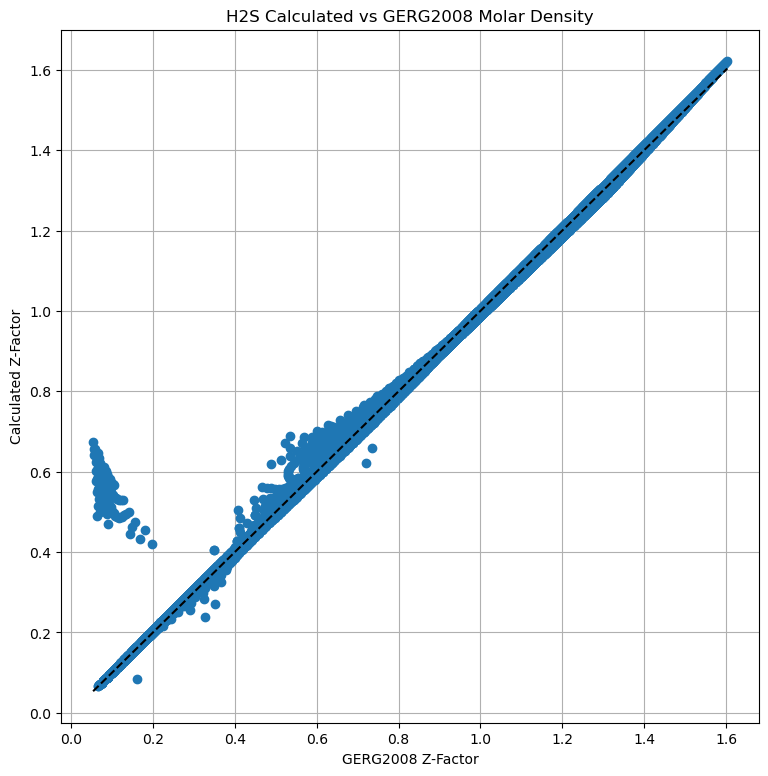

Average Relative error: 0.022891465348691162
95% of data better than error: 0.018341039520409105


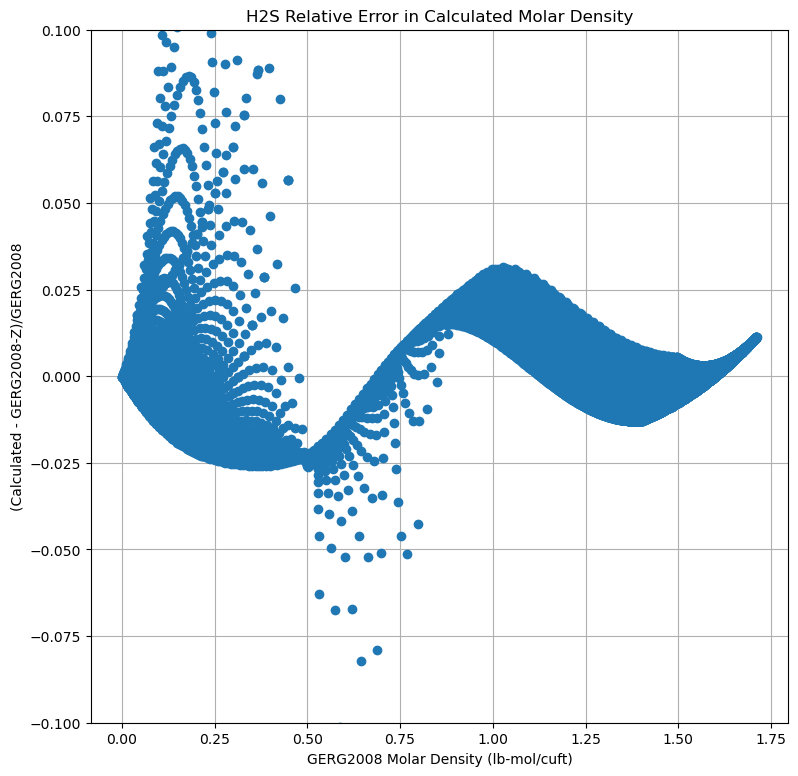

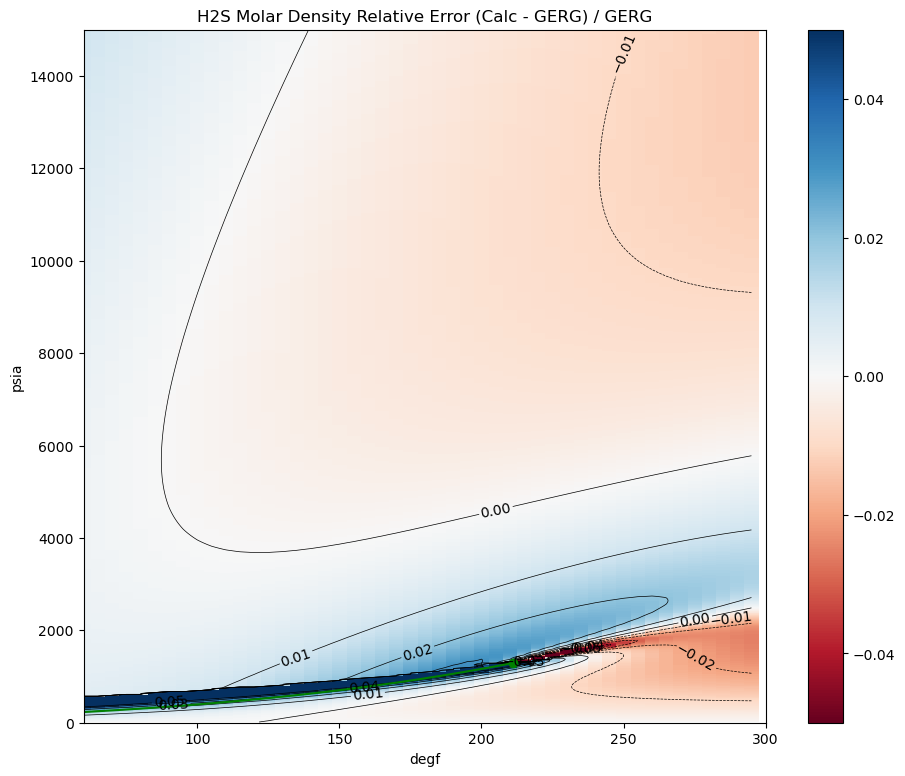

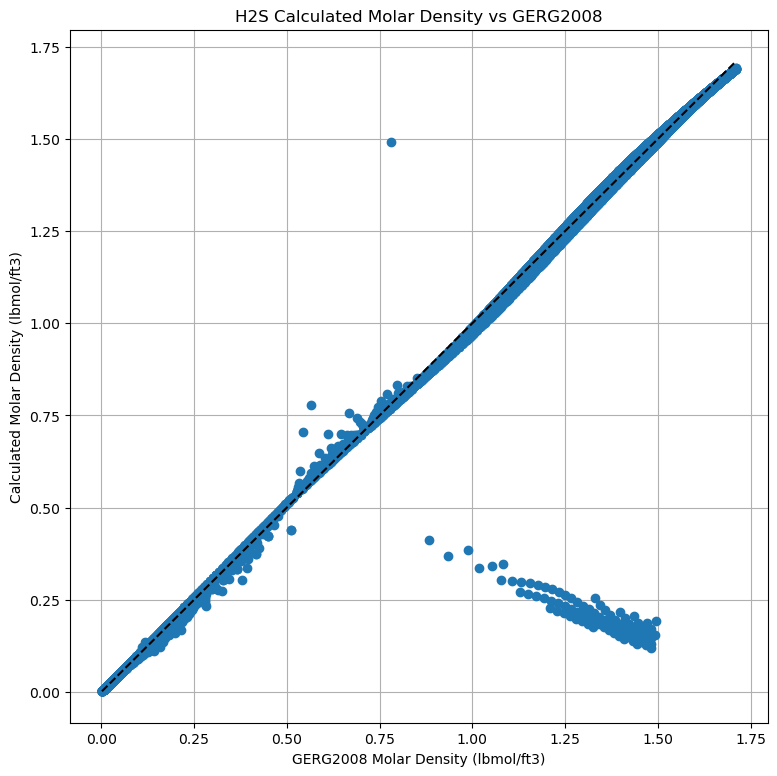

Average Relative absolute error: 0.009059963046596299
95% of data better than error: 0.018213254844799413


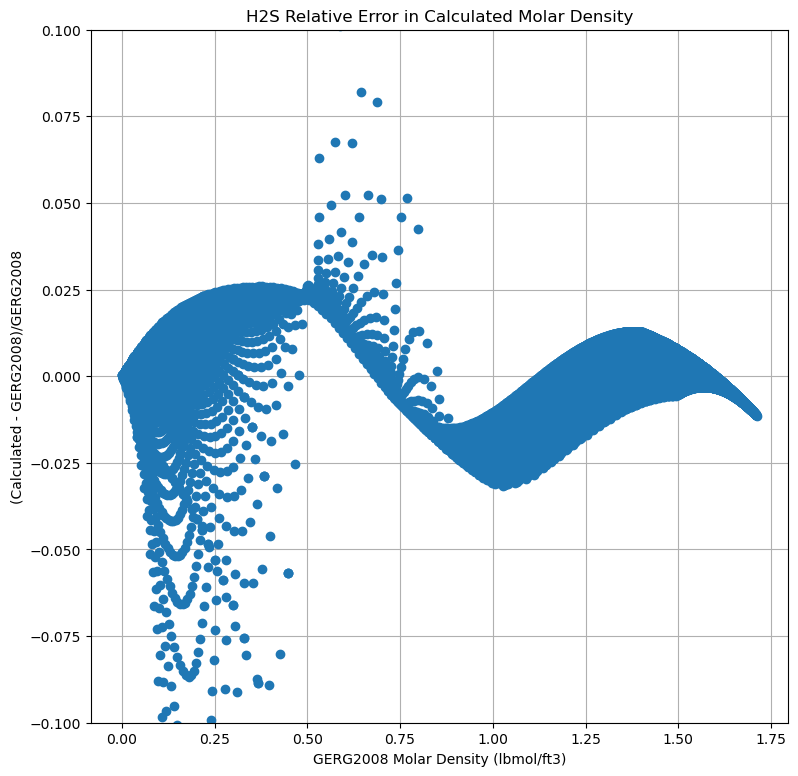

In [141]:
# Compare pure H2S
mwGas = 34.082
sg = mwGas/mwAir
co2, h2s, n2, h2 = 0.0, 1.0, 0.0, 0
df = pd.read_excel('Z-GERG_H2S.xlsx')#, sheet_name='H2S')
degfs = np.array(df['Temperature (F)'])
psias = np.array(df['Pressure (psia)'])
Zs = np.array(df['Z-Gerg'])
molar_densities = psias/(Zs*R*(degfs+degF2R)) # lb-mol/(cuft.lbm)
calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sg, co2=co2, h2s=h2s, n2=n2, h2=h2))
calc_Zs = np.array(calc_Zs)
calc_molar_densities = psias/(calc_Zs*R*(degfs+degF2R))
errs = np.abs(calc_Zs - Zs)/Zs
Zplots('H2S', [211, 5.25712E-05, 0.006800431, 1.976840918, 76.61435745])
molar_plots('H2S')

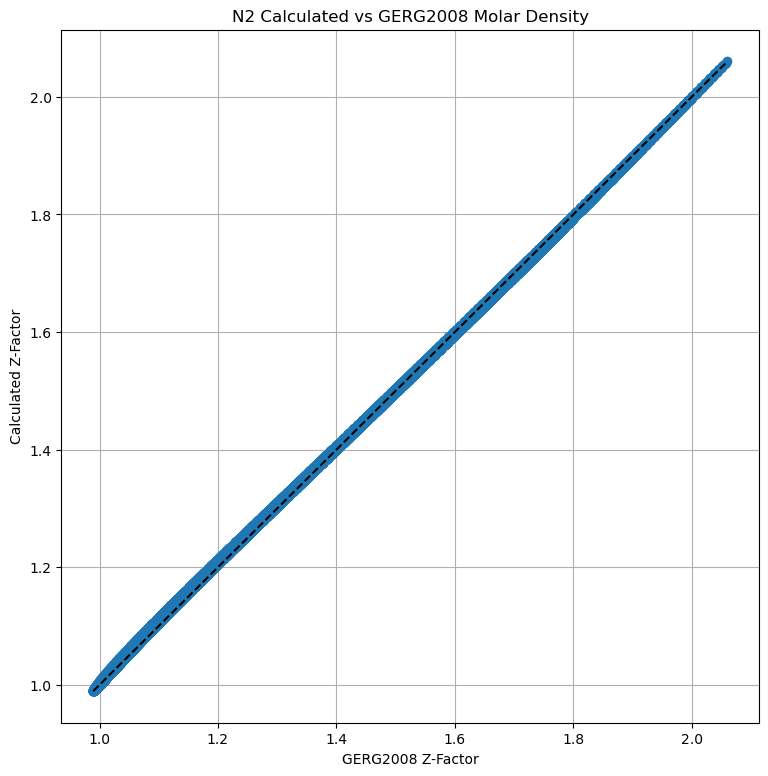

Average Relative error: 0.00373869954117536
95% of data better than error: 0.009984981217412777


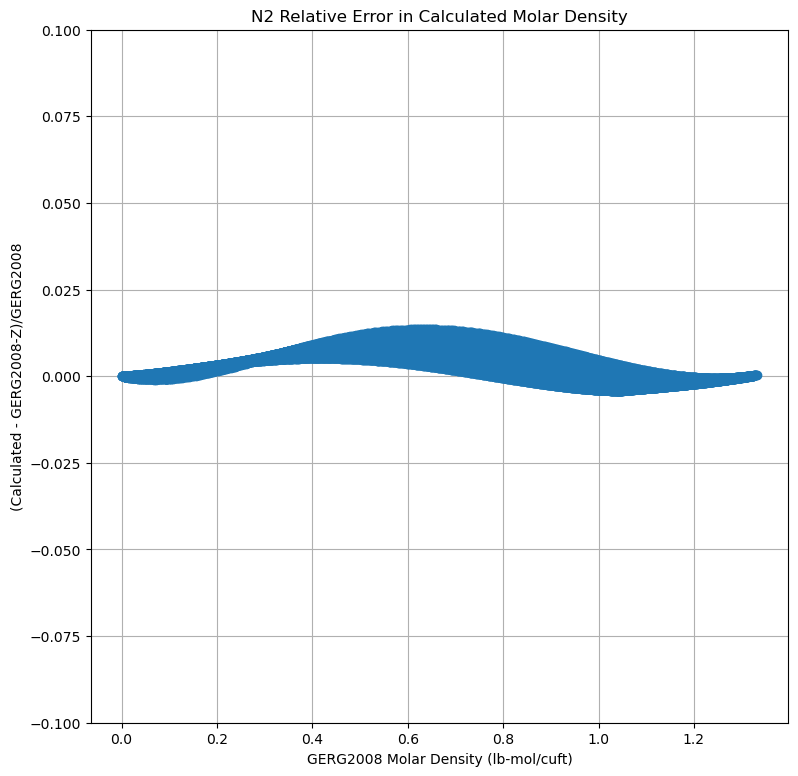

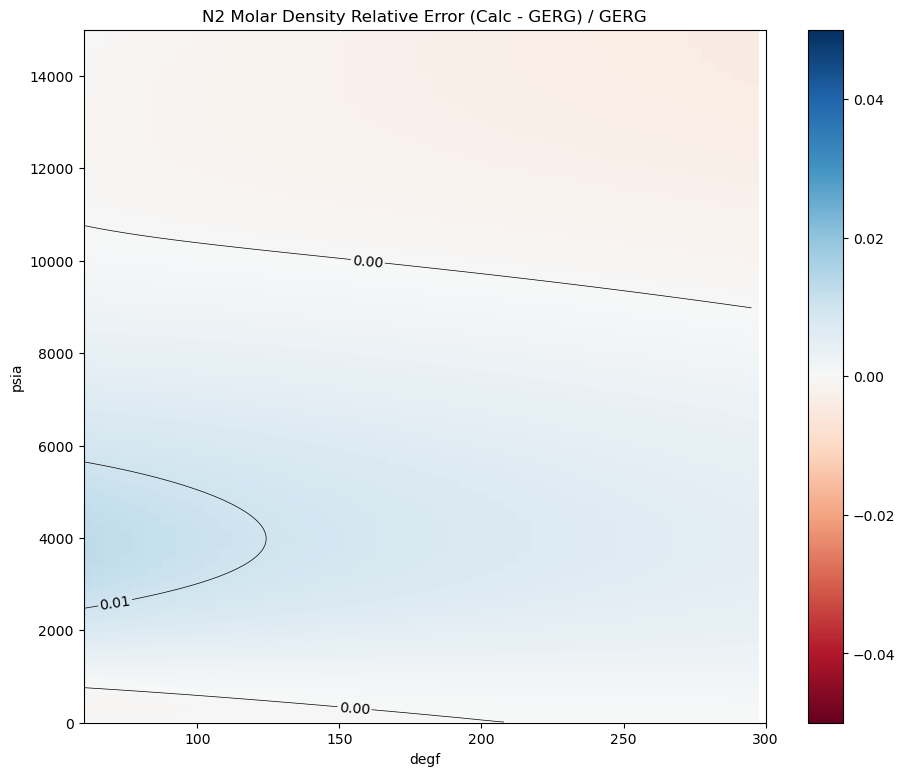

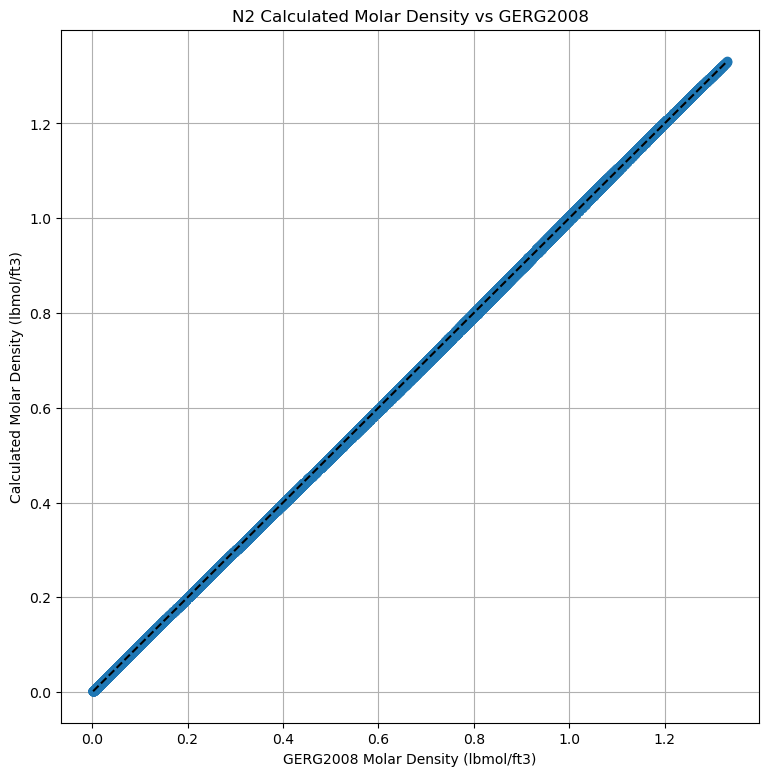

Average Relative absolute error: 0.0037187225416078088
95% of data better than error: 0.009886267026336012


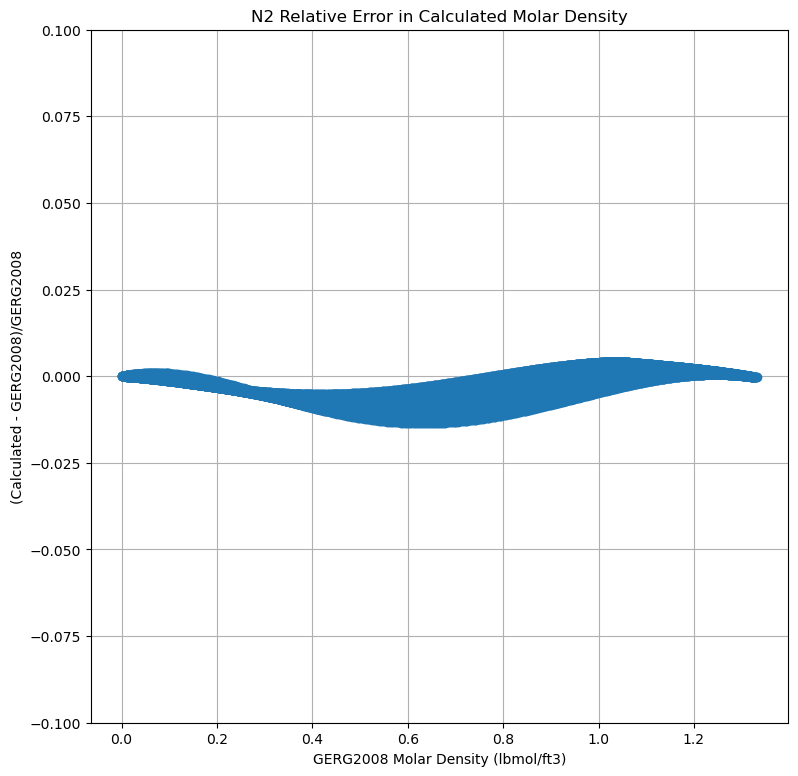

In [142]:
# Compare pure N2
mwGas = 28.014
sg = mwGas/mwAir
co2, h2s, n2, h2 = 0.0, 0.0, 1.0, 0
df = pd.read_excel('Z-GERG_N2.xlsx')#, sheet_name='N2')
degfs = np.array(df['Temperature (F)'])
psias = np.array(df['Pressure (psia)'])
Zs = np.array(df['Z-Gerg'])
molar_densities = psias/(Zs*R*(degfs+degF2R))
calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sg, co2=co2, h2s=h2s, n2=n2, h2=h2))
calc_Zs = np.array(calc_Zs)
calc_molar_densities = psias/(calc_Zs*R*(degfs+degF2R))
errs = np.abs(calc_Zs - Zs)/Zs
Zplots('N2', [-233, 0.000323591, 0.333366681, 114.9031482, 13251.33895])
molar_plots('N2')

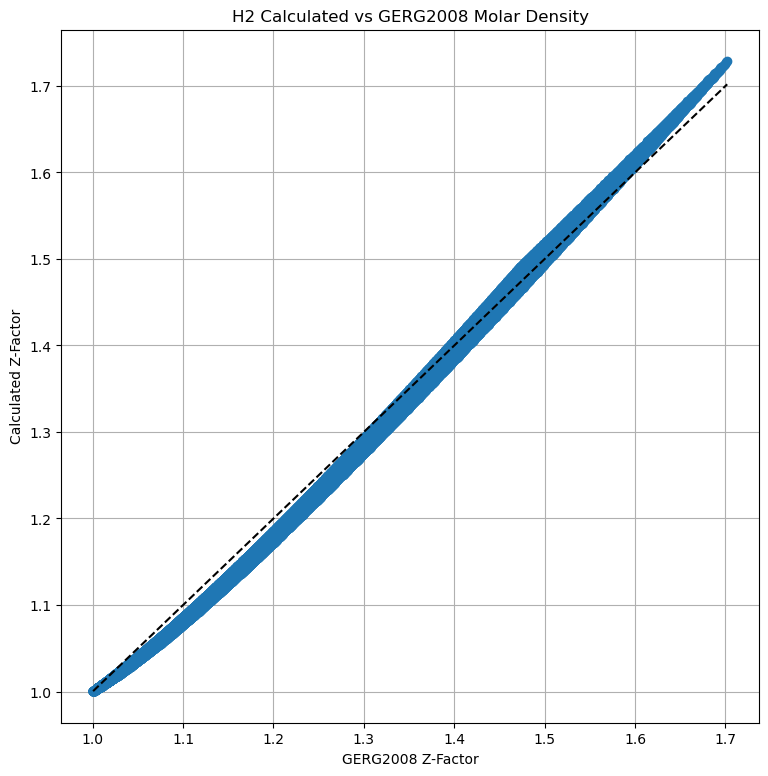

Average Relative error: 0.010497442055744311
95% of data better than error: 0.02027813433559569


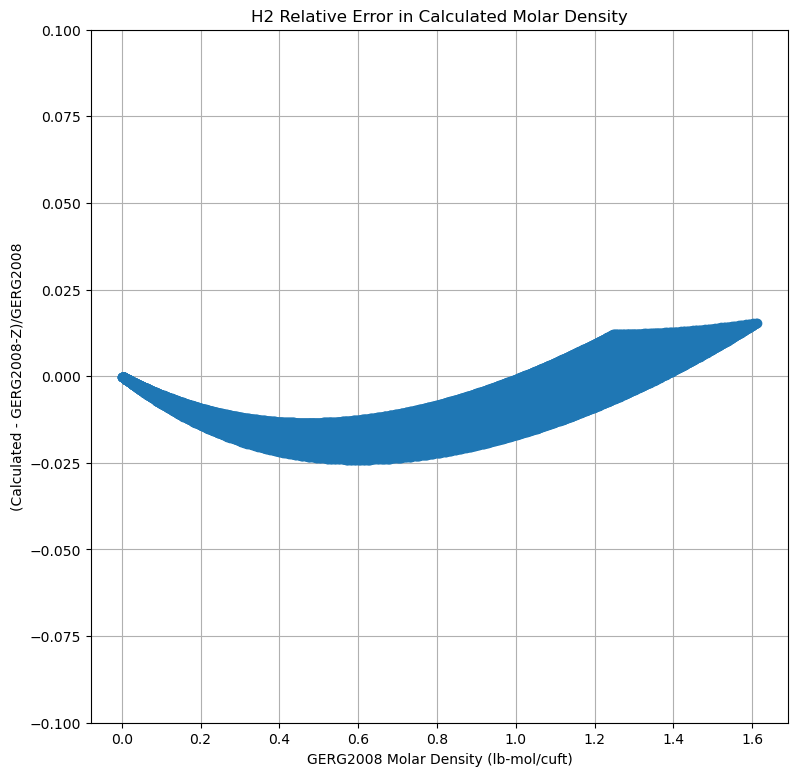

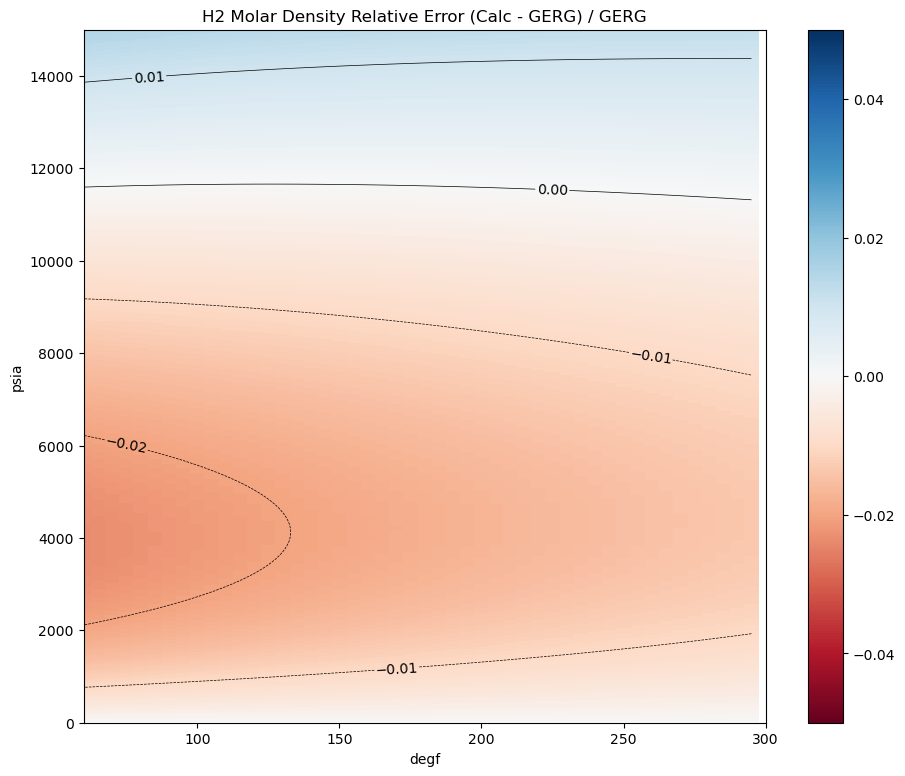

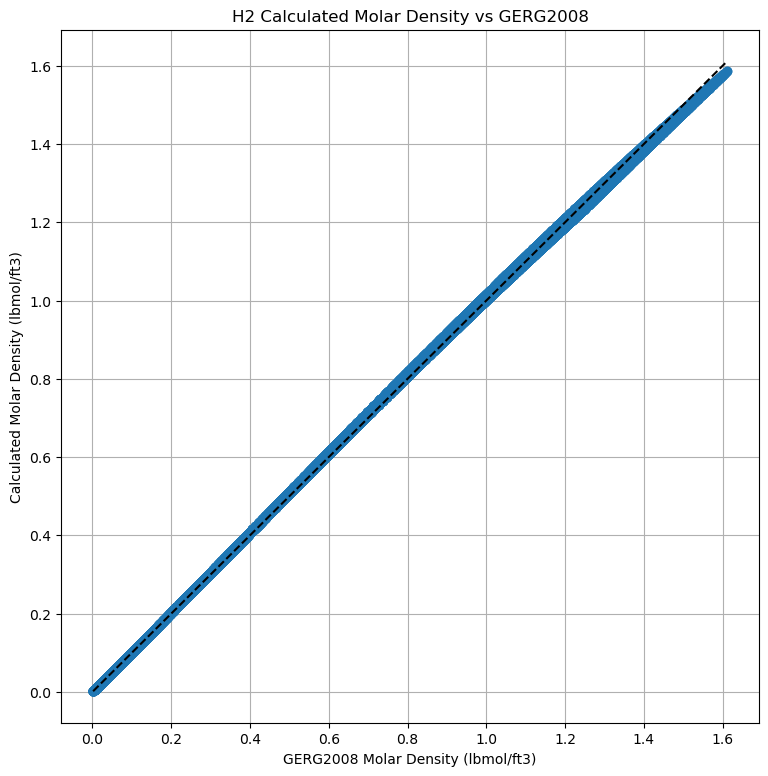

Average Relative absolute error: 0.010617675210821732
95% of data better than error: 0.02069784807976676


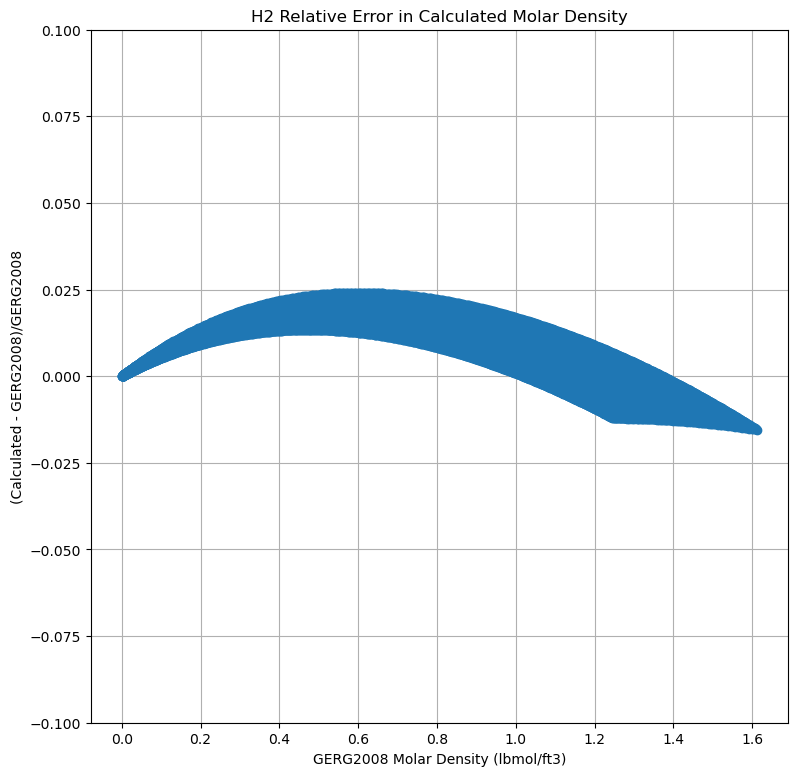

In [143]:
# Compare pure H2
mwGas = 2.016
sg = mwGas/mwAir
co2, h2s, n2, h2 = 0.0, 0.0, 0.0, 1.0
df = pd.read_excel('Z-GERG_H2.xlsx')#, sheet_name='H2')
degfs = np.array(df['Temperature (F)'])
psias = np.array(df['Pressure (psia)'])
Zs = np.array(df['Z-Gerg'])
molar_densities = psias/(Zs*R*(degfs+degF2R))
calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sg, co2=co2, h2s=h2s, n2=n2, h2=h2))
calc_Zs = np.array(calc_Zs)
calc_molar_densities = psias/(calc_Zs*R*(degfs+degF2R))
errs = np.abs(calc_Zs - Zs)/Zs
Zplots('H2', [-233, 0.000323591, 0.333366681, 114.9031482, 13251.33895])
molar_plots('H2')

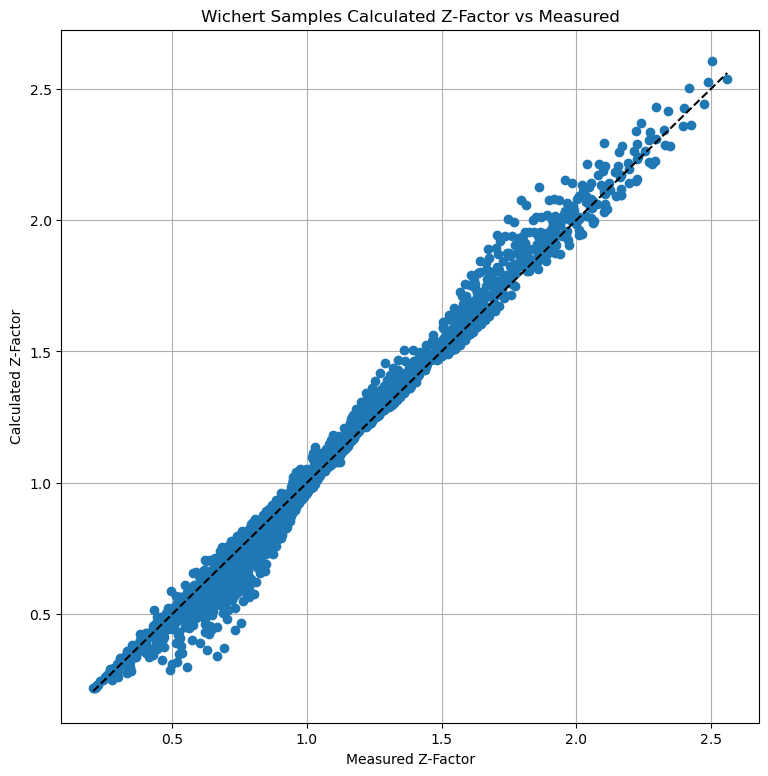

Average Relative error: 0.032654291694688295
99% of data better than error: 0.23173994283492313


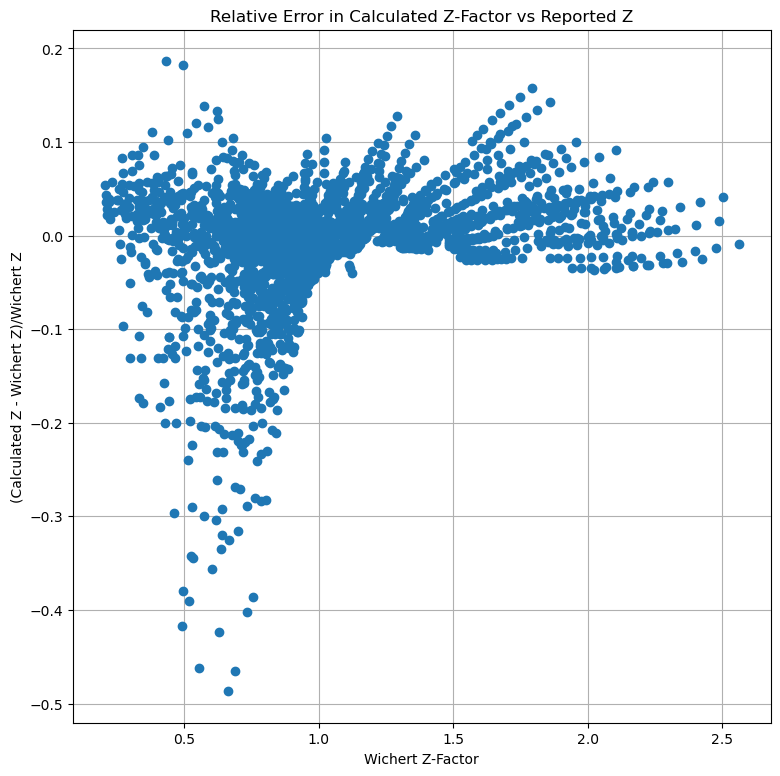

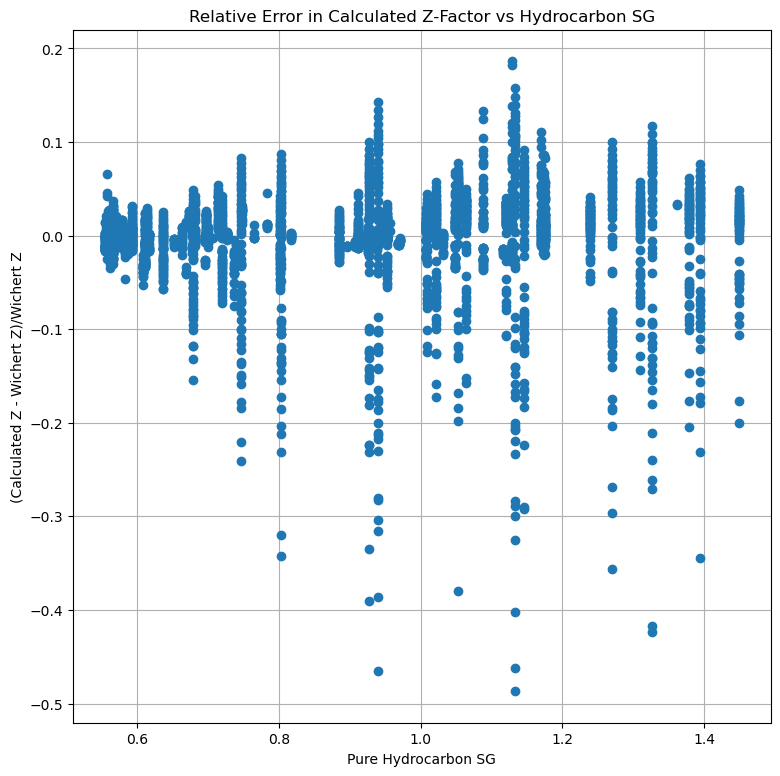

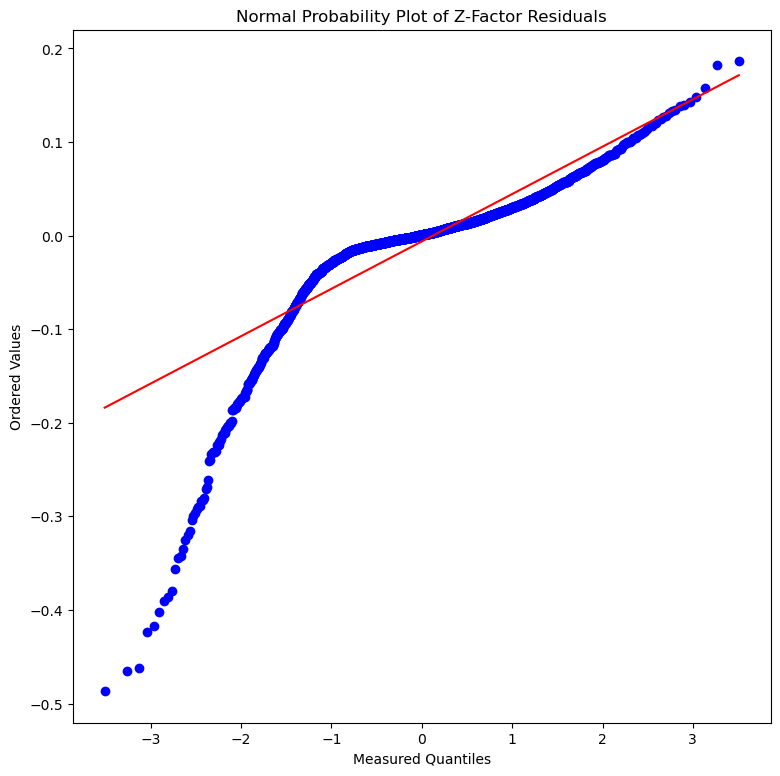

In [7]:
# Compare Wichert data
df = pd.read_excel('Wichert_data_export3.xlsx')

degfs = np.array(df['degf'])
psias = np.array(df['psia'])
sgs = np.array(df['sg'])
co2s = np.array(df['co2'])
h2ss = np.array(df['h2s'])
n2s = np.array(df['n2'])
Zs = np.array(df['Z'])

sg_hc = (sgs - (co2s * 44.01 + h2ss * 34.082 + n2s * 28.014) / mwAir) / (1 - co2s - h2ss - n2s)

calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sgs[i], co2=co2s[i], h2s=h2ss[i], n2=n2s[i]))
calc_Zs = np.array(calc_Zs)

z_dak_pmc = np.array([rtb.gas_z(psias[i], sgs[i], degfs[i], zmethod='DAK', cmethod='PMC', co2 = co2s[i], h2s = h2ss[i], n2 = n2s[i] ) for i in range(len(psias))])
z_dak_sut = np.array([rtb.gas_z(psias[i], sgs[i], degfs[i], zmethod='DAK', cmethod='SUT', co2 = co2s[i], h2s = h2ss[i], n2 = n2s[i] ) for i in range(len(psias))])

plt.plot(Zs, calc_Zs, 'o')
plt.plot([min(Zs), max(Zs)], [min(Zs), max(Zs)], '--', c='k')
plt.title('Wichert Samples Calculated Z-Factor vs Measured')
plt.xlabel('Measured Z-Factor')
plt.ylabel('Calculated Z-Factor')
plt.grid()
plt.savefig('images\\'+'wichert.png')
plt.show()
errs = np.abs(calc_Zs - Zs)/Zs
print('Average Relative error:',np.mean(errs))
print('99% of data better than error:', np.percentile(errs, 99))

errs = (calc_Zs - Zs)/Zs
plt.plot(Zs, errs, 'o')
plt.title('Relative Error in Calculated Z-Factor vs Reported Z')
plt.xlabel('Wichert Z-Factor')
plt.ylabel('(Calculated Z - Wichert Z)/Wichert Z')
plt.grid()
plt.savefig('images\\'+'rel_wichert.png')
plt.show()

plt.plot(sg_hc, errs, 'o')
plt.title('Relative Error in Calculated Z-Factor vs Hydrocarbon SG')
plt.xlabel('Pure Hydrocarbon SG')
plt.ylabel('(Calculated Z - Wichert Z)/Wichert Z')
plt.grid()
plt.savefig('images\\'+'rel_wichert_HC_SG.png')
plt.show()

fig, ax = plt.subplots()
res = stats.probplot(errs, plot=ax)
ax.set_title('Normal Probability Plot of Z-Factor Residuals')
ax.set_xlabel('Measured Quantiles')
ax.set_ylabel('Ordered Values')
plt.savefig('images\\'+'norm_wichert.png')
plt.show()

In [151]:
errs = (calc_Zs - Zs)/Zs
for i in list(np.where(np.abs(errs)>0.1)[0]):
    print(i, calc_Zs[i], Zs[i], degfs[i], psias[i], sgs[i], co2s[i], h2ss[i], n2s[i])

1173 0.47580313729832596 0.555776702472846 60 1500 1.133006558508802 0.6 0.0 0.0
1236 0.4330064086736896 0.4915787762175754 90 1500 1.326082153952364 0.8 0.0 0.0
2643 0.4232465643653307 0.380549701066628 120 1500 1.170438384535727 0.0 0.2 0.0
2650 0.48795181730923703 0.4418023762617609 150 1500 1.170438384535727 0.0 0.2 0.0
2853 0.4941833014879362 0.4332879014433707 60 1500 1.1285467725233 0.0 0.0 0.2
2860 0.5616678914136096 0.49543704236804 90 1500 1.1285467725233 0.0 0.0 0.2


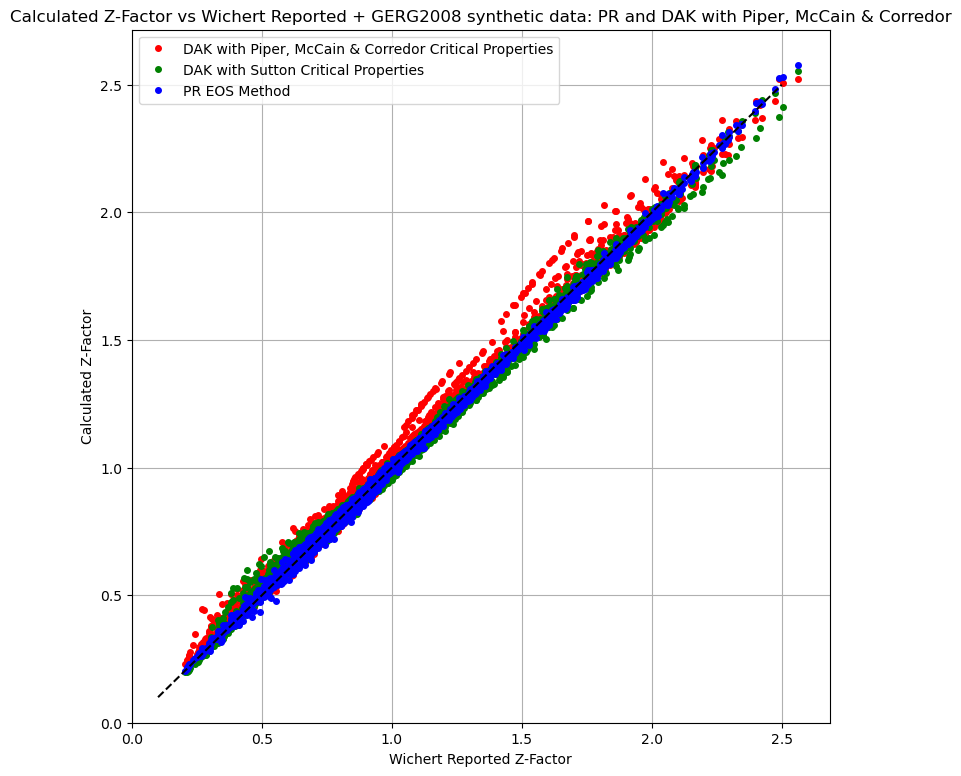

In [152]:
plt.plot(Zs, z_dak_pmc, 'o', c='r', markersize=4, label='DAK with Piper, McCain & Corredor Critical Properties')
plt.plot(Zs, z_dak_sut, 'o', c='g', markersize=4, label='DAK with Sutton Critical Properties')
plt.plot(Zs, calc_Zs, 'o', c='b', markersize=4, label='PR EOS Method')
plt.xlabel('Wichert Reported Z-Factor')
plt.ylabel('Calculated Z-Factor')
plt.plot([0.1, 2.5], [0.1, 2.5], '--', c='k')
plt.ylim(0, None)
plt.xlim(0, None)
plt.grid()
plt.title('Calculated Z-Factor vs Wichert Reported + GERG2008 synthetic data: PR and DAK with Piper, McCain & Corredor')
plt.legend(loc='upper left')
plt.savefig('images\\'+'Crossplot_Z-PR_DAK_extended.png')
plt.show()

In [153]:
pr_er = (calc_Zs - Zs)/Zs
dak_sut_err = (z_dak_sut - Zs)/Zs
dak_pmc_err = (z_dak_pmc - Zs)/Zs

errs = [pr_er, dak_sut_err, dak_pmc_err]
names = ['Peng Robinson', 'DAK + Sutton & Wichert', 'DAK + PMC']
for e, err in enumerate(errs):
    avg = np.mean(err)
    maxerr = max(err)
    print(names[e], 'Avg Rel. Error: '+str(round(avg, 3))+', Max rel. Error: '+str(round(maxerr, 3))+', 95% Errors less than ', str(round(np.percentile(err, 95),4)))

Peng Robinson Avg Rel. Error: -0.002, Max rel. Error: 0.141, 95% Errors less than  0.0322
DAK + Sutton & Wichert Avg Rel. Error: 0.003, Max rel. Error: 0.359, 95% Errors less than  0.0618
DAK + PMC Avg Rel. Error: 0.024, Max rel. Error: 0.651, 95% Errors less than  0.122


              psia      degf       co2       h2s        n2     sg_hc  Residual
psia      1.000000  0.085194  0.083600  0.025577  0.117934  0.193452 -0.210670
degf      0.085194  1.000000  0.028806  0.012623  0.053889  0.123846 -0.121017
co2       0.083600  0.028806  1.000000 -0.337935 -0.277348  0.100566 -0.261010
h2s       0.025577  0.012623 -0.337935  1.000000 -0.314835  0.011540  0.135022
n2        0.117934  0.053889 -0.277348 -0.314835  1.000000  0.146743  0.031443
sg_hc     0.193452  0.123846  0.100566  0.011540  0.146743  1.000000  0.296319
Residual -0.210670 -0.121017 -0.261010  0.135022  0.031443  0.296319  1.000000


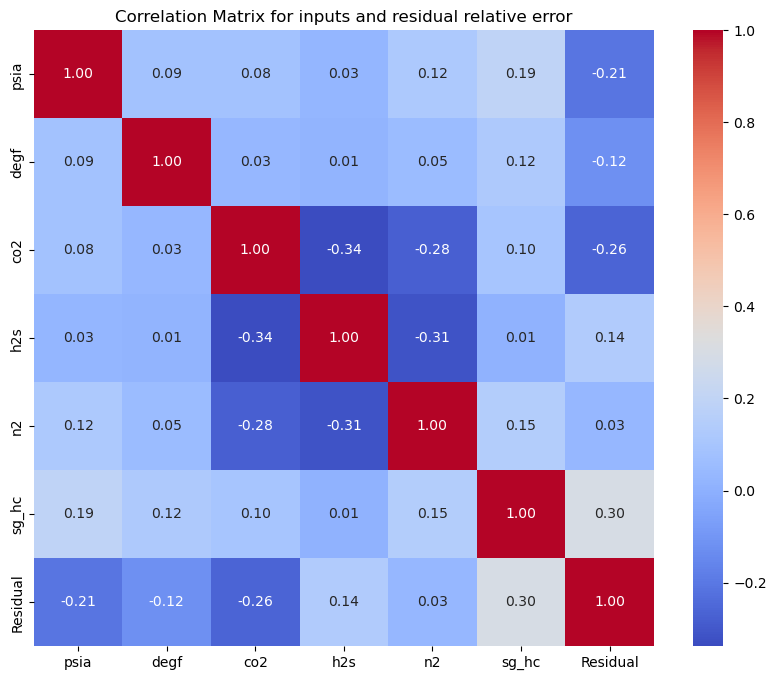

In [154]:
errs = (calc_Zs - Zs)/Zs
if 'Sample' in list(df):
    df.drop(columns = ['Sample'], inplace=True)
if 'Source' in list(df):
    df.drop(columns = ['Source'], inplace=True)
try:
    df.drop(columns = ['Z'], inplace=True)
    df['sg_hc'] = (df['sg'] - (df['co2'] * 44.01 + df['h2s'] * 34.082 + df['n2'] * 28.014) / 28.97) / (1 - df['co2'] - df['h2s'] - df['n2'])
    df.drop(columns = ['sg'], inplace=True)
except:
    pass
df['Residual'] = errs
correlation_matrix = df.corr()
print(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for inputs and residual relative error')
plt.savefig('images\\'+'corel_wichert.png')
plt.show()

              psia      degf       co2       h2s        n2     sg_hc  Residual
psia      1.000000  0.085194  0.083600  0.025577  0.117934  0.193452  0.885459
degf      0.085194  1.000000  0.028806  0.012623  0.053889  0.123846  0.106106
co2       0.083600  0.028806  1.000000 -0.337935 -0.277348  0.100566 -0.044781
h2s       0.025577  0.012623 -0.337935  1.000000 -0.314835  0.011540 -0.187029
n2        0.117934  0.053889 -0.277348 -0.314835  1.000000  0.146743  0.302671
sg_hc     0.193452  0.123846  0.100566  0.011540  0.146743  1.000000  0.161756
Residual  0.885459  0.106106 -0.044781 -0.187029  0.302671  0.161756  1.000000


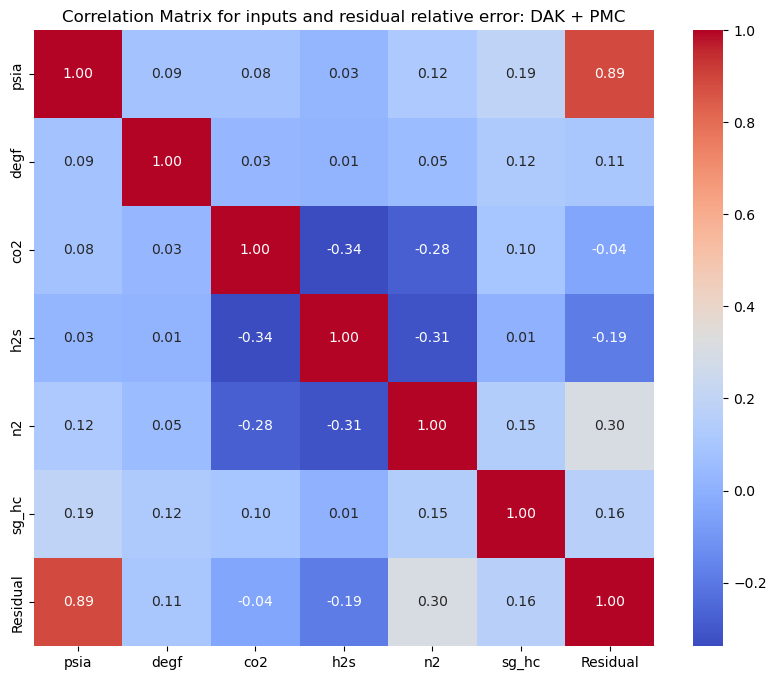

In [155]:
# DAK + PMC
errs = z_dak_pmc
if 'Sample' in list(df):
    df.drop(columns = ['Sample'], inplace=True)
if 'Source' in list(df):
    df.drop(columns = ['Source'], inplace=True)
try:
    df.drop(columns = ['Z'], inplace=True)
    df['sg_hc'] = (df['sg'] - (df['co2'] * 44.01 + df['h2s'] * 34.082 + df['n2'] * 28.014) / 28.97) / (1 - df['co2'] - df['h2s'] - df['n2'])
    df.drop(columns = ['sg'], inplace=True)
except:
    pass
df['Residual'] = errs
correlation_matrix = df.corr()
print(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for inputs and residual relative error: DAK + PMC')
plt.savefig('images\\'+'corel_wichert_DAK_PMC.png')
plt.show()

              psia      degf       co2       h2s        n2     sg_hc  Residual
psia      1.000000  0.085194  0.083600  0.025577  0.117934  0.193452  0.870979
degf      0.085194  1.000000  0.028806  0.012623  0.053889  0.123846  0.110052
co2       0.083600  0.028806  1.000000 -0.337935 -0.277348  0.100566 -0.042163
h2s       0.025577  0.012623 -0.337935  1.000000 -0.314835  0.011540 -0.247234
n2        0.117934  0.053889 -0.277348 -0.314835  1.000000  0.146743  0.304231
sg_hc     0.193452  0.123846  0.100566  0.011540  0.146743  1.000000  0.123165
Residual  0.870979  0.110052 -0.042163 -0.247234  0.304231  0.123165  1.000000


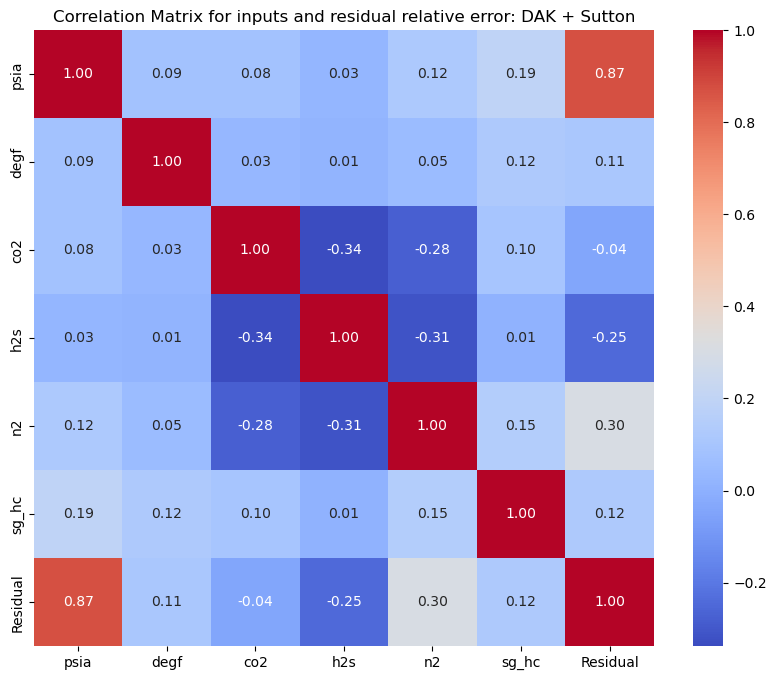

In [156]:
# DAK + Sutton & Wichert
errs = z_dak_sut
if 'Sample' in list(df):
    df.drop(columns = ['Sample'], inplace=True)
if 'Source' in list(df):
    df.drop(columns = ['Source'], inplace=True)
try:
    df.drop(columns = ['Z'], inplace=True)
    df['sg_hc'] = (df['sg'] - (df['co2'] * 44.01 + df['h2s'] * 34.082 + df['n2'] * 28.014) / 28.97) / (1 - df['co2'] - df['h2s'] - df['n2'])
    df.drop(columns = ['sg'], inplace=True)
except:
    pass
df['Residual'] = errs
correlation_matrix = df.corr()
print(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for inputs and residual relative error: DAK + Sutton')
plt.savefig('images\\'+'corel_wichert_DAK_PMC.png')
plt.show()

In [157]:
errs = (calc_Zs - Zs)/Zs
for i in list(np.where(np.abs(errs)>0.08)[0]):
    print(i, degfs[i], psias[i], sgs[i], co2s[i], h2ss[i], n2s[i])
    

1173 60 1500 1.133006558508802 0.6 0.0 0.0
1236 90 1500 1.326082153952364 0.8 0.0 0.0
1852 90 1500 1.270169140490162 0.6 0.0 0.0
1915 120 1500 1.394663444943045 0.8 0.0 0.0
1957 60 1500 0.9526406627545737 0.0 0.2 0.0
2636 90 1500 1.170438384535727 0.0 0.2 0.0
2643 120 1500 1.170438384535727 0.0 0.2 0.0
2650 150 1500 1.170438384535727 0.0 0.2 0.0
2699 120 1500 1.171943389713497 0.0 0.4 0.0
2706 150 1500 1.171943389713497 0.0 0.4 0.0
2762 150 1500 1.173448394891267 0.0 0.6 0.0
2825 180 1500 1.174953400069037 0.0 0.8 0.0
2853 60 1500 1.1285467725233 0.0 0.0 0.2
2854 60 2000 1.1285467725233 0.0 0.0 0.2
2860 90 1500 1.1285467725233 0.0 0.0 0.2
2861 90 2000 1.1285467725233 0.0 0.0 0.2
2867 120 1500 1.1285467725233 0.0 0.0 0.2
2868 120 2000 1.1285467725233 0.0 0.0 0.2


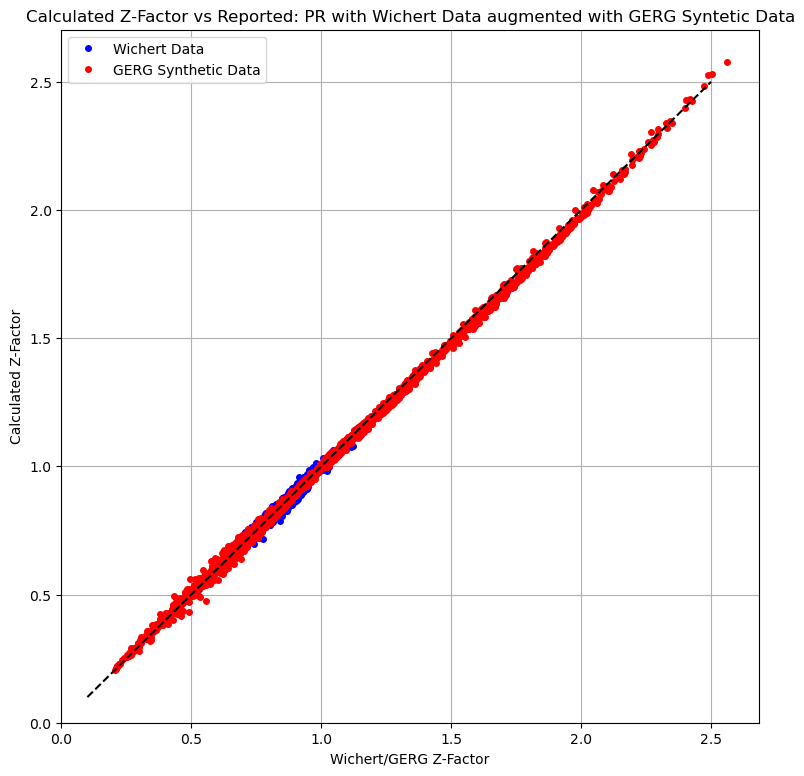

In [159]:
# Compare Wichert & synthetic GERG data
df = pd.read_excel('Wichert_data_export3.xlsx')
filtered = df[df['Source'] == 'Wichert']

degfs = np.array(filtered['degf'])
psias = np.array(filtered['psia'])
sgs = np.array(filtered['sg'])
co2s = np.array(filtered['co2'])
h2ss = np.array(filtered['h2s'])
n2s = np.array(filtered['n2'])
Zs = np.array(filtered['Z'])

calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sgs[i], co2=co2s[i], h2s=h2ss[i], n2=n2s[i]))
calc_Zs = np.array(calc_Zs)
plt.plot(Zs, calc_Zs, 'o', c='b', markersize=4, label='Wichert Data')

filtered = df[df['Source'] == 'GERG']

degfs = np.array(filtered['degf'])
psias = np.array(filtered['psia'])
sgs = np.array(filtered['sg'])
co2s = np.array(filtered['co2'])
h2ss = np.array(filtered['h2s'])
n2s = np.array(filtered['n2'])
Zs = np.array(filtered['Z'])

calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sgs[i], co2=co2s[i], h2s=h2ss[i], n2=n2s[i]))
calc_Zs = np.array(calc_Zs)
plt.plot(Zs, calc_Zs, 'o', c='r', markersize=4, label='GERG Synthetic Data')

plt.xlabel('Wichert/GERG Z-Factor')
plt.ylabel('Calculated Z-Factor')
plt.plot([0.1, 2.5], [0.1, 2.5], '--', c='k')
plt.ylim(0, None)
plt.xlim(0, None)
plt.grid()
plt.title('Calculated Z-Factor vs Reported: PR with Wichert Data augmented with GERG Syntetic Data')
plt.legend(loc='upper left')
plt.savefig('images\\'+'Crossplot_Z-PR_GERG&Wichert.png')
plt.show()

# Against 'pure' Wichert data only, contracts PR and GERG2008 Z-Factor predictions
## Note: Wichert data given to C7+ has been extended to C10+ assuming exponential relationship, and C10 properties used for C10+

PR predictions as good, if not slightly better on average

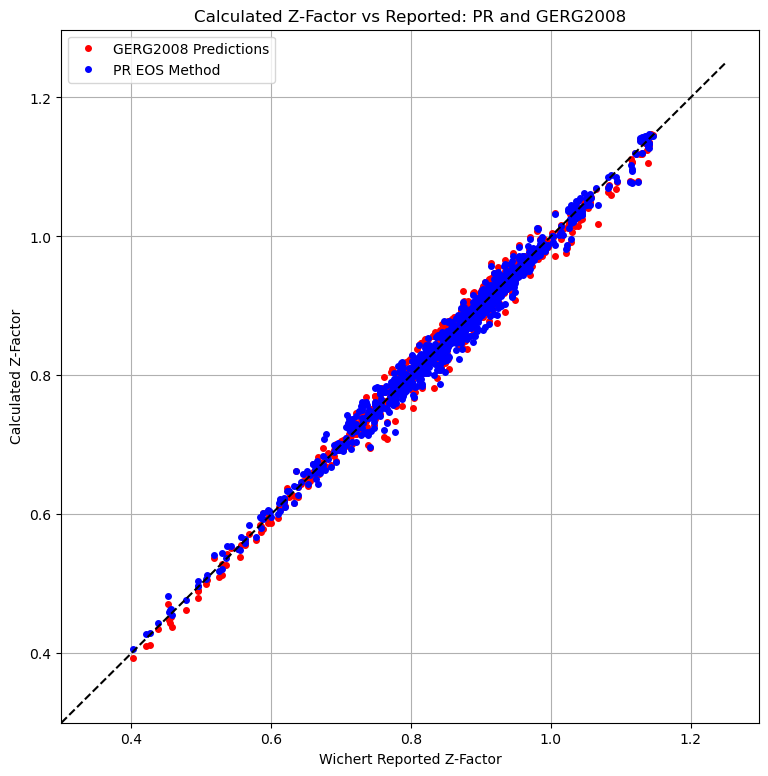

In [12]:
# Compare Wichert data only, including GERG2008 predictions against Wichert mixtures
df = pd.read_excel('Wichert_data_export3.xlsx')
filtered = df[df['Source'] == 'Wichert']

degfs = np.array(filtered['degf'])
psias = np.array(filtered['psia'])
sgs = np.array(filtered['sg'])
co2s = np.array(filtered['co2'])
h2ss = np.array(filtered['h2s'])
n2s = np.array(filtered['n2'])
Zs = np.array(filtered['Z'])

c1s = np.array(filtered['C1'])
c2s = np.array(filtered['C2'])
c3s = np.array(filtered['C3'])
ic4s = np.array(filtered['iC4'])
nc4s = np.array(filtered['nC4'])
ic5s = np.array(filtered['iC5'])
nc5s = np.array(filtered['nC5'])
c6s = np.array(filtered['C6'])
c7s = np.array(filtered['C7'])
c8s = np.array(filtered['C8'])
c9s = np.array(filtered['C9'])
c10s = np.array(filtered['C9'])
yis = [np.array([c1s[i], c2s[i], c3s[i], ic4s[i], nc4s[i], ic5s[i], nc5s[i], c6s[i], c7s[7], c8s[i], c9s[i], c10s[i]]) for i in range(len(c1s))]
       
GERG_Zs = []
calc_Zs = []
       
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sgs[i], co2=co2s[i], h2s=h2ss[i], n2=n2s[i]))
    GERG_Zs.append(gerg2.gerg_z2(psias[i], degfs[i], yis[i], co2=co2s[i], h2s=h2ss[i], n2=n2s[i], h2 = 0))
calc_Zs = np.array(calc_Zs)

#z_dak_pmc = np.array([rtb.gas_z(psias[i], sgs[i], degfs[i], zmethod='DAK', cmethod='PMC', co2 = co2s[i], h2s = h2ss[i], n2 = n2s[i] ) for i in range(len(psias))])
#z_dak_sut = np.array([rtb.gas_z(psias[i], sgs[i], degfs[i], zmethod='DAK', cmethod='SUT', co2 = co2s[i], h2s = h2ss[i], n2 = n2s[i] ) for i in range(len(psias))])

#plt.plot(Zs, z_dak_pmc, 'o', c='r', markersize=4, label='DAK with Piper, McCain & Corredor Critical Properties')
#plt.plot(Zs, z_dak_sut, 'o', c='g', markersize=4, label='DAK with Sutton Critical Properties')
plt.plot(Zs, GERG_Zs, 'o', c='r', markersize=4, label='GERG2008 Predictions')
plt.plot(Zs, calc_Zs, 'o', c='b', markersize=4, label='PR EOS Method')

plt.xlabel('Wichert Reported Z-Factor')
plt.ylabel('Calculated Z-Factor')
plt.plot([0.3, 1.25], [0.3, 1.25], '--', c='k')
plt.ylim(0.3, None)
plt.xlim(0.3, None)
plt.grid()
plt.title('Calculated Z-Factor vs Reported: PR and GERG2008')

plt.legend(loc='upper left')
plt.savefig('images\\'+'Crossplot_Z-PR_GERG.png')
plt.show()

In [13]:
pr_er = (calc_Zs - Zs)/Zs
GERG_Zs = np.array(GERG_Zs)
gerg_err = (GERG_Zs - Zs)/Zs

errs = [pr_er, gerg_err]
names = ['Peng Robinson', 'GERG2008']
for e, err in enumerate(errs):
    avg = np.mean(err)
    maxerr = max(err)
    print(names[e], 'Avg Rel. Error: '+str(round(avg, 3))+', Max rel. Error: '+str(round(maxerr, 3))+', 95% Errors less than ', str(round(np.percentile(err, 95),4)))

Peng Robinson Avg Rel. Error: -0.001, Max rel. Error: 0.066, 95% Errors less than  0.0263
GERG2008 Avg Rel. Error: 0.001, Max rel. Error: 0.053, 95% Errors less than  0.0289


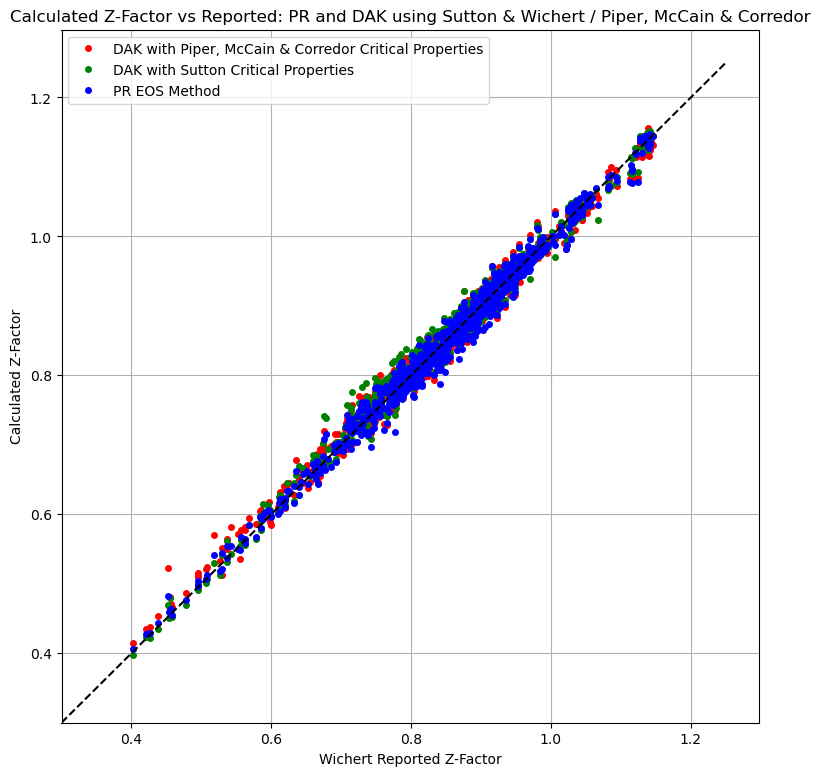

In [8]:
# Compare Wichert data only
df = pd.read_excel('Wichert_data_export3.xlsx')
filtered = df[df['Source'] == 'Wichert']

degfs = np.array(filtered['degf'])
psias = np.array(filtered['psia'])
sgs = np.array(filtered['sg'])
co2s = np.array(filtered['co2'])
h2ss = np.array(filtered['h2s'])
n2s = np.array(filtered['n2'])
Zs = np.array(filtered['Z'])

calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sgs[i], co2=co2s[i], h2s=h2ss[i], n2=n2s[i]))
calc_Zs = np.array(calc_Zs)

z_dak_pmc = np.array([rtb.gas_z(psias[i], sgs[i], degfs[i], zmethod='DAK', cmethod='PMC', co2 = co2s[i], h2s = h2ss[i], n2 = n2s[i] ) for i in range(len(psias))])
z_dak_sut = np.array([rtb.gas_z(psias[i], sgs[i], degfs[i], zmethod='DAK', cmethod='SUT', co2 = co2s[i], h2s = h2ss[i], n2 = n2s[i] ) for i in range(len(psias))])



plt.plot(Zs, z_dak_pmc, 'o', c='r', markersize=4, label='DAK with Piper, McCain & Corredor Critical Properties')
plt.plot(Zs, z_dak_sut, 'o', c='g', markersize=4, label='DAK with Sutton Critical Properties')
plt.plot(Zs, calc_Zs, 'o', c='b', markersize=4, label='PR EOS Method')

plt.xlabel('Wichert Reported Z-Factor')
plt.ylabel('Calculated Z-Factor')
plt.plot([0.3, 1.25], [0.3, 1.25], '--', c='k')
plt.ylim(0.3, None)
plt.xlim(0.3, None)
plt.grid()
plt.title('Calculated Z-Factor vs Reported: PR and DAK using Sutton & Wichert / Piper, McCain & Corredor')

plt.legend(loc='upper left')
plt.savefig('images\\'+'Crossplot_Z-PR_DAK.png')
plt.show()

In [161]:
pr_er = (calc_Zs - Zs)/Zs
dak_sut_err = (z_dak_sut - Zs)/Zs
dak_pmc_err = (z_dak_pmc - Zs)/Zs

errs = [pr_er, dak_sut_err, dak_pmc_err]
names = ['Peng Robinson', 'DAK + Sutton & Wichert', 'DAK + PMC']
for e, err in enumerate(errs):
    avg = np.mean(err)
    maxerr = max(err)
    print(names[e], 'Avg Rel. Error: '+str(round(avg, 3))+', Max rel. Error: '+str(round(maxerr, 3))+', 95% Errors less than ', str(round(np.percentile(err, 95),4)))

Peng Robinson Avg Rel. Error: -0.001, Max rel. Error: 0.066, 95% Errors less than  0.0263
DAK + Sutton & Wichert Avg Rel. Error: 0.007, Max rel. Error: 0.097, 95% Errors less than  0.0336
DAK + PMC Avg Rel. Error: 0.004, Max rel. Error: 0.157, 95% Errors less than  0.0349


C:\Users\burmr\AppData\Local\Temp\ipykernel_6844\706048884.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.drop(columns = ['Sample'], inplace=True)
C:\Users\burmr\AppData\Local\Temp\ipykernel_6844\706048884.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.drop(columns = ['Source'], inplace=True)
C:\Users\burmr\AppData\Local\Temp\ipykernel_6844\706048884.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter

              psia      degf       co2       h2s        n2     sg_hc  Residual
psia      1.000000  0.234101 -0.087336  0.014026  0.080536  0.341707  0.194136
degf      0.234101  1.000000 -0.091556  0.014794  0.159696  0.398276  0.023969
co2      -0.087336 -0.091556  1.000000 -0.196992 -0.073442 -0.076788  0.036543
h2s       0.014026  0.014794 -0.196992  1.000000  0.065775 -0.157621 -0.013469
n2        0.080536  0.159696 -0.073442  0.065775  1.000000  0.333616  0.101108
sg_hc     0.341707  0.398276 -0.076788 -0.157621  0.333616  1.000000  0.010159
Residual  0.194136  0.023969  0.036543 -0.013469  0.101108  0.010159  1.000000


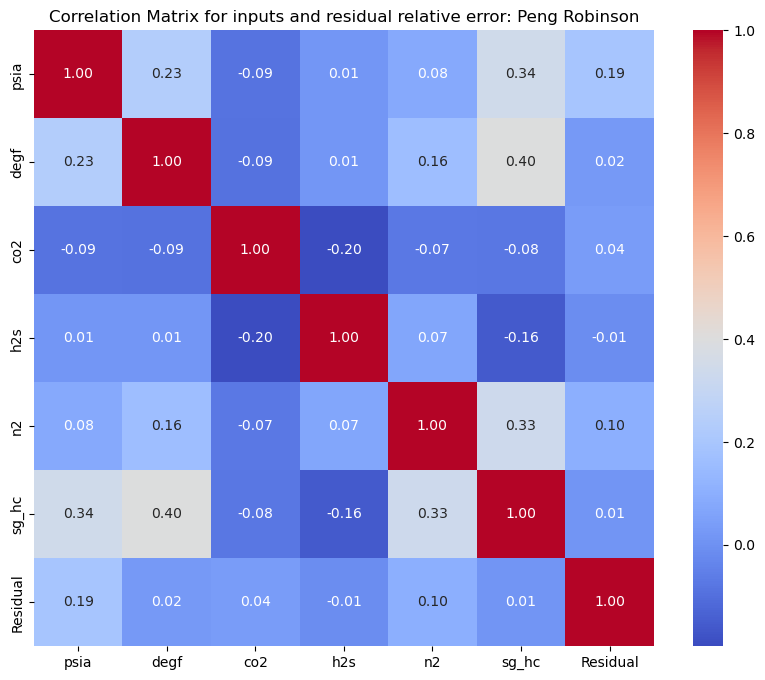

In [162]:
# Peng Robinson
errs = pr_er

if 'Sample' in list(filtered):
    filtered.drop(columns = ['Sample'], inplace=True)
if 'Source' in list(filtered):
    filtered.drop(columns = ['Source'], inplace=True)
try:
    filtered.drop(columns = ['Z'], inplace=True)
    filtered['sg_hc'] = (filtered['sg'] - (filtered['co2'] * 44.01 + filtered['h2s'] * 34.082 + filtered['n2'] * 28.014) / 28.97) / (1 - df['co2'] - df['h2s'] - df['n2'])
    filtered.drop(columns = ['sg'], inplace=True)
except:
    pass
filtered['Residual'] = errs
correlation_matrix = filtered.corr()
print(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for inputs and residual relative error: Peng Robinson')
plt.savefig('images\\'+'corel_wichert_PR.png')
plt.show()

C:\Users\burmr\AppData\Local\Temp\ipykernel_6844\241938257.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Residual'] = errs


              psia      degf       co2       h2s        n2     sg_hc  Residual
psia      1.000000  0.234101 -0.087336  0.014026  0.080536  0.341707 -0.164524
degf      0.234101  1.000000 -0.091556  0.014794  0.159696  0.398276 -0.212475
co2      -0.087336 -0.091556  1.000000 -0.196992 -0.073442 -0.076788  0.167026
h2s       0.014026  0.014794 -0.196992  1.000000  0.065775 -0.157621 -0.164870
n2        0.080536  0.159696 -0.073442  0.065775  1.000000  0.333616  0.006051
sg_hc     0.341707  0.398276 -0.076788 -0.157621  0.333616  1.000000 -0.132556
Residual -0.164524 -0.212475  0.167026 -0.164870  0.006051 -0.132556  1.000000


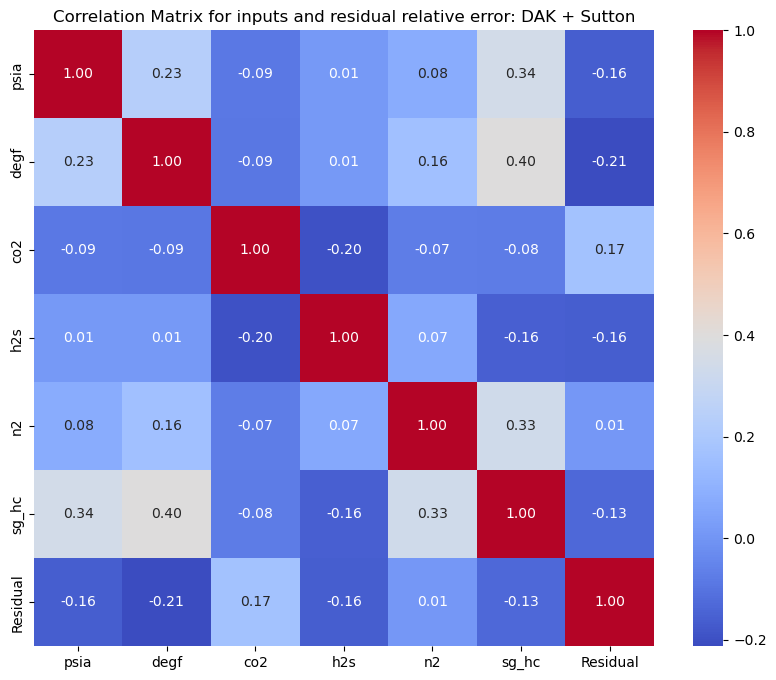

In [163]:
# DAK + Sutton & Wichert
errs = dak_sut_err

if 'Sample' in list(filtered):
    filtered.drop(columns = ['Sample'], inplace=True)
if 'Source' in list(filtered):
    filtered.drop(columns = ['Source'], inplace=True)
try:
    filtered.drop(columns = ['Z'], inplace=True)
    filtered['sg_hc'] = (filtered['sg'] - (filtered['co2'] * 44.01 + filtered['h2s'] * 34.082 + filtered['n2'] * 28.014) / 28.97) / (1 - df['co2'] - df['h2s'] - df['n2'])
    filtered.drop(columns = ['sg'], inplace=True)
except:
    pass
filtered['Residual'] = errs
correlation_matrix = filtered.corr()
print(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for inputs and residual relative error: DAK + Sutton')
plt.savefig('images\\'+'corel_wichert_DAK_Sutton.png')
plt.show()

C:\Users\burmr\AppData\Local\Temp\ipykernel_6844\3950299680.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Residual'] = errs


              psia      degf       co2       h2s        n2     sg_hc  Residual
psia      1.000000  0.234101 -0.087336  0.014026  0.080536  0.341707 -0.146988
degf      0.234101  1.000000 -0.091556  0.014794  0.159696  0.398276 -0.117471
co2      -0.087336 -0.091556  1.000000 -0.196992 -0.073442 -0.076788 -0.135898
h2s       0.014026  0.014794 -0.196992  1.000000  0.065775 -0.157621  0.192306
n2        0.080536  0.159696 -0.073442  0.065775  1.000000  0.333616  0.181971
sg_hc     0.341707  0.398276 -0.076788 -0.157621  0.333616  1.000000  0.017156
Residual -0.146988 -0.117471 -0.135898  0.192306  0.181971  0.017156  1.000000


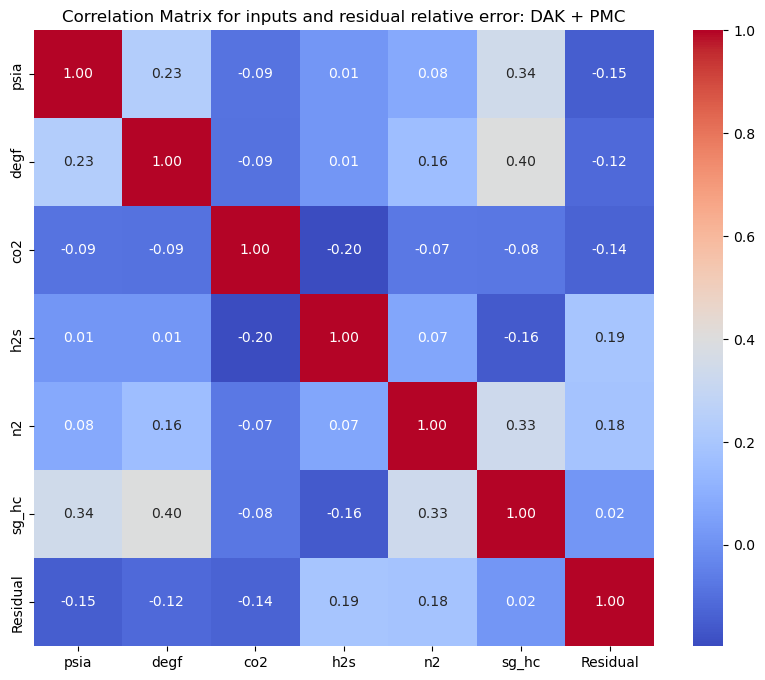

In [164]:
# DAK + PMC
errs = dak_pmc_err

if 'Sample' in list(filtered):
    filtered.drop(columns = ['Sample'], inplace=True)
if 'Source' in list(filtered):
    filtered.drop(columns = ['Source'], inplace=True)
try:
    filtered.drop(columns = ['Z'], inplace=True)
    filtered['sg_hc'] = (filtered['sg'] - (filtered['co2'] * 44.01 + filtered['h2s'] * 34.082 + filtered['n2'] * 28.014) / 28.97) / (1 - df['co2'] - df['h2s'] - df['n2'])
    filtered.drop(columns = ['sg'], inplace=True)
except:
    pass
filtered['Residual'] = errs
correlation_matrix = filtered.corr()
print(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for inputs and residual relative error: DAK + PMC')
plt.savefig('images\\'+'corel_wichert_DAK_PMC.png')
plt.show()

<Axes: xlabel='co2', ylabel='Count'>

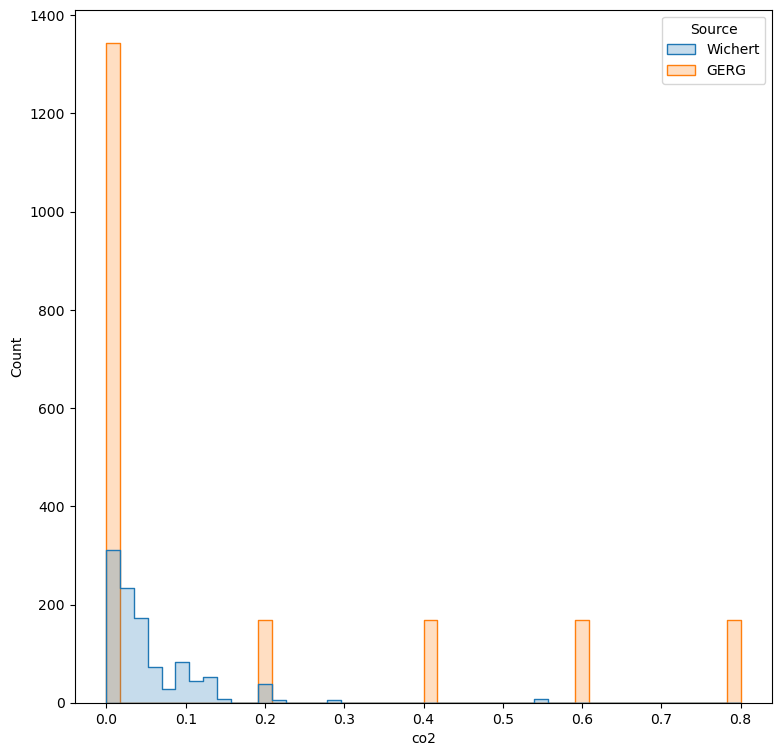

In [117]:
# plot overlapping histograms
sns.histplot(df, x='co2', hue='Source', element="step")

<Axes: xlabel='h2s', ylabel='Count'>

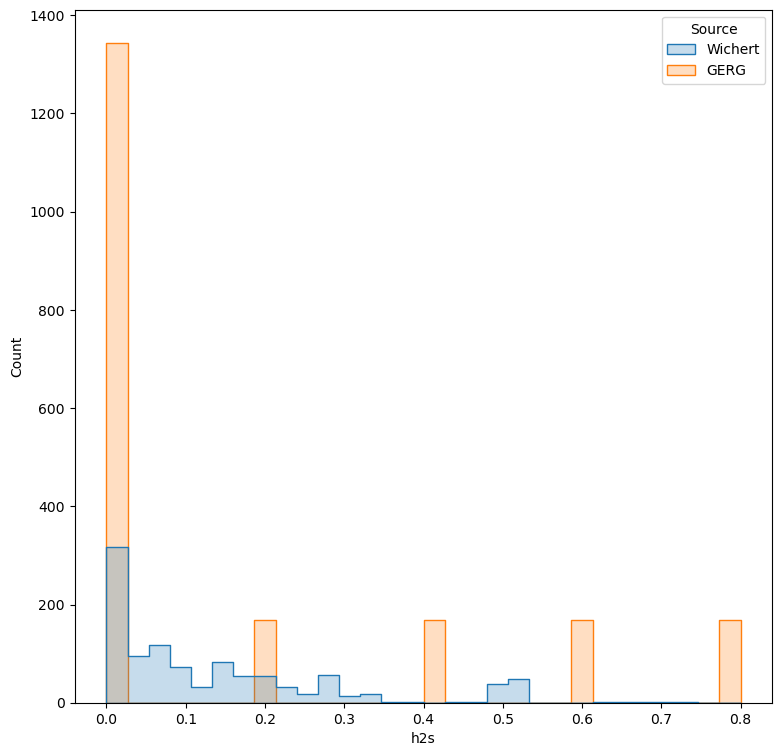

In [118]:
# plot overlapping histograms
sns.histplot(df, x='h2s', hue='Source', element="step")

<Axes: xlabel='n2', ylabel='Count'>

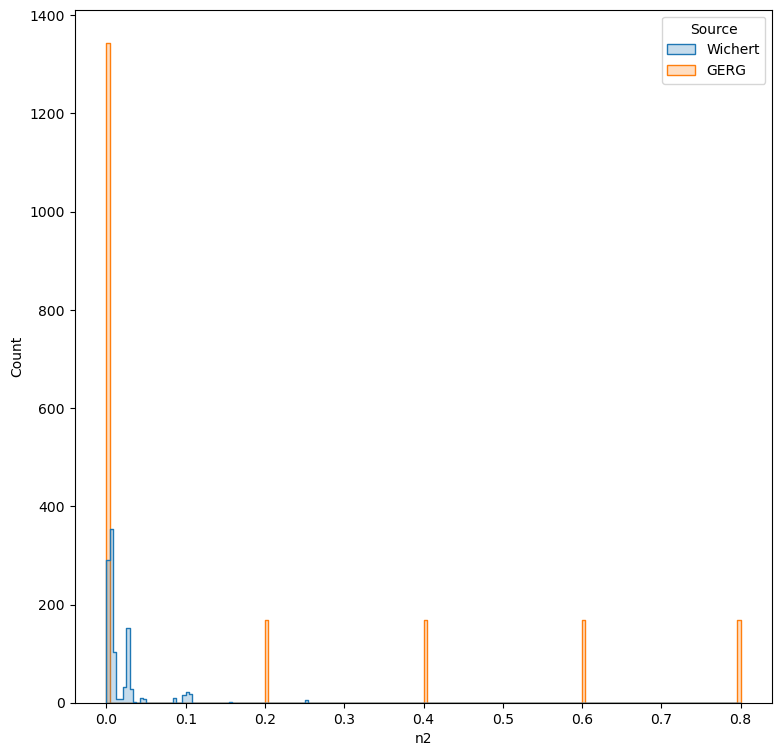

In [119]:
# plot overlapping histograms
sns.histplot(df, x='n2', hue='Source', element="step")